In [1]:
! pip install openpyxl

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel("../crawling/data/all_comments.xlsx", engine='openpyxl')
df.head()

,Unnamed: 0,contents,point
0,0,개맛있다\n문제 : 면이 빨리 불어요 어차피 빨리 나오니까 추가할 거면 이따 시키세요,5
1,1,정말 맛있어요. \n일본에서 먹던 맛을 살리면서도 한국인 입맛도 만족시켜주는 곳입니...,5
2,2,"국물의 깊이, 얇은 면, 향이 진한 차슈, 그외의 토핑들 그리고 무한리필. 저는 이...",5
3,3,맛있더라ㅋㅋ 근데 조금 비싸더랑,5
4,4,너무 웨이팅이 길어요..노답..,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5003 non-null   int64 
 1   contents    4365 non-null   object
 2   point       5003 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 117.4+ KB


In [6]:
df.isnull().sum()

Unnamed: 0      0
contents      638
point           0
dtype: int64

In [7]:
print(df['contents'].nunique())
df = df.drop_duplicates(subset=['contents'])
df.nunique()

4310


Unnamed: 0    4311
contents      4310
point            5
dtype: int64

In [8]:
df = df.dropna(how='any')
df.isnull().values.sum()

0

In [9]:
import re

df['contents'] = df['contents'].apply(lambda x : re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", x))
df.head()

,Unnamed: 0,contents,point
0,0,개맛있다문제 면이 빨리 불어요 어차피 빨리 나오니까 추가할 거면 이따 시키세요,5
1,1,정말 맛있어요 일본에서 먹던 맛을 살리면서도 한국인 입맛도 만족시켜주는 곳입니다 면...,5
2,2,국물의 깊이 얇은 면 향이 진한 차슈 그외의 토핑들 그리고 무한리필 저는 이곳의 부...,5
3,3,맛있더라ㅋㅋ 근데 조금 비싸더랑,5
4,4,너무 웨이팅이 길어요노답,3


In [10]:
df.loc[df['contents'] =='', 'contents'].value_counts()

contents
    9
Name: count, dtype: int64

In [11]:
df['contents'].replace("", np.nan, inplace=True)
df = df.dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4301 entries, 0 to 4998
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4301 non-null   int64 
 1   contents    4301 non-null   object
 2   point       4301 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 134.4+ KB


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4301 entries, 0 to 4998
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4301 non-null   int64 
 1   contents    4301 non-null   object
 2   point       4301 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 134.4+ KB


<Axes: xlabel='point'>

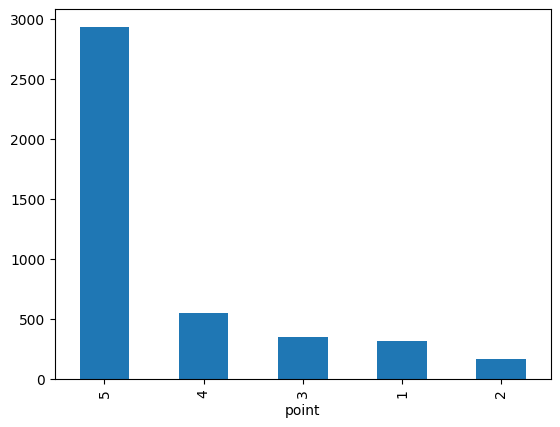

In [13]:
df['point'].value_counts().plot(kind='bar')

In [14]:
df['label'] = df['point'].apply(lambda x: 0 if x in [1, 2, 3] else 1)

In [15]:
negative_count = df[df['label'] == 0].shape[0]
positive_sample = df[df['label'] == 1].sample(n=negative_count, random_state=42)
df = pd.concat([df[df['label'] == 0], positive_sample])
df['label'].value_counts()

label
0    822
1    822
Name: count, dtype: int64

In [16]:
df.loc[df['label']== 1]

,Unnamed: 0,contents,point,label
4753,4753,음식 나오는 속도 빠르고 붓카케우동 시켰는데 면발 쫄깃탱탱하고 맛있습니다,5,1
2420,2420,책 엄청 많아서 재밌는 거 골라서 읽으면서 커피 마시는데 시간 진짜 훅 가네요 커...,5,1
475,475,유자시오,5,1
2266,2266,맛있어요 서비스도 주시구 친절하세여,5,1
4431,4431,고기도 구워주시구 파김치랑 해물탕 소주 안주 좋아요 ㅎㅎ,5,1
...,...,...,...,...
3769,3769,비쥬얼이 장난아니에요 여기곱창 때깔이 아주 곱습니다맛도 최공,5,1
3265,3265,황곱모듬구이 먹었어요양이 알차고 너무 맛있어요,5,1
4742,4742,중학교 일학년 때 홍대에 현장체험학습으로 연극보고 친구들이랑 먹었던 우동집 그 땐 ...,5,1
316,316,일본 거주했지만 일본에도 여기보다 맛있는 가게는 손에 꼽을정도 밖에없음 한국 탑 에...,5,1
